### Machine learning enhances agriculture by analyzing soil conditions such as moisture, temperature, and chemical makeup which significantly impacts crop growth. This precision allows farmers to manage plants and animals almost individually, improving decision-making effectiveness. Additionally, machine learning can predict harvest yields, evaluate crop quality, and detect diseases and weed infestations, capabilities that were previously unattainable.

## Import the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import GradientBoostingClassifier



# Load the dataset

In [2]:
data = pd.read_csv('../input/crop-recommendation-dataset/Crop_recommendation.csv')
data.head()# Check the first few rows of the dataset 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


Check the shape of the dataset

In [4]:
data.shape

(2200, 8)

Check for columns in the dataset

In [5]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
num_cols = data.select_dtypes(include = 'number').columns
num_cols # Checks for the numerical columns in the dataset

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [7]:
cat_cols = data.select_dtypes(exclude = 'number').columns
cat_cols # Checks for categorical columns in the dataset

Index(['label'], dtype='object')

In [8]:
# Checks for descriptive statistics of the dataset
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
data.describe(include =  'object').T

,count,unique,top,freq
label,2200,22,muskmelon,100


# Exploratory Data Analysis

### Heatmap to check null/missing values

In [10]:
# This checks for missing values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

The dataset has no missing values. This is Good!

In [11]:
#Checks for duplicated columns
data.duplicated().sum()


0

- Our Dataset Returns value 0 Meaning there are no duplicated columns

In [12]:
data['N'].value_counts()

40     44
22     44
27     42
39     41
31     41
       ..
127     2
130     1
46      1
135     1
139     1
Name: N, Length: 137, dtype: int64

In [13]:
data['P'].value_counts()

60    56
58    48
56    46
55    44
57    42
      ..
90     2
82     2
83     2
93     1
84     1
Name: P, Length: 117, dtype: int64

In [14]:
data['K'].value_counts()

17    90
22    87
15    86
20    80
25    78
      ..
84     8
82     8
13     7
7      5
80     4
Name: K, Length: 73, dtype: int64

In [15]:
data['label'].value_counts()

muskmelon      100
mungbean       100
maize          100
coconut        100
kidneybeans    100
banana         100
rice           100
papaya         100
jute           100
orange         100
pigeonpeas     100
apple          100
cotton         100
pomegranate    100
chickpea       100
watermelon     100
lentil         100
blackgram      100
mango          100
mothbeans      100
grapes         100
coffee         100
Name: label, dtype: int64

In [16]:
data.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

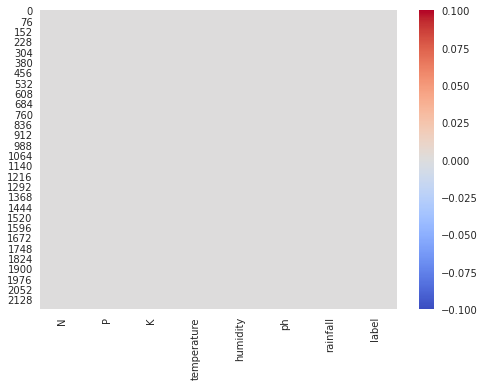

In [17]:
sns.heatmap(data.isnull(),cmap="coolwarm")# A heatmap showing the presence of missing values, Checks out that there are no missing values in our dataset.
plt.show()

# Visualize Temperature and Ph to show their distribution

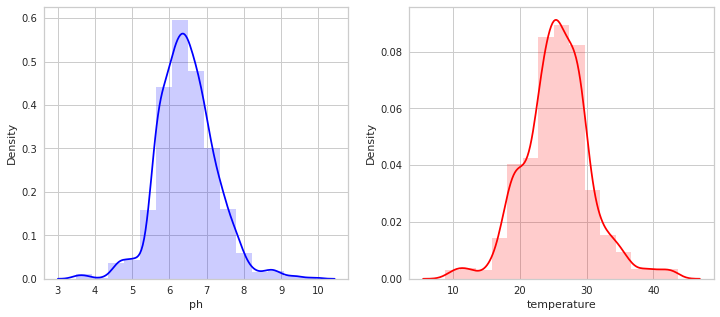

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(data['ph'],color="blue",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(data['temperature'],color="red",bins=15,hist_kws={'alpha':0.2})
plt.show()

    
- The distribution takes symmetrical and bell shape, showing that the results will near average.

<AxesSubplot:xlabel='count', ylabel='label'>

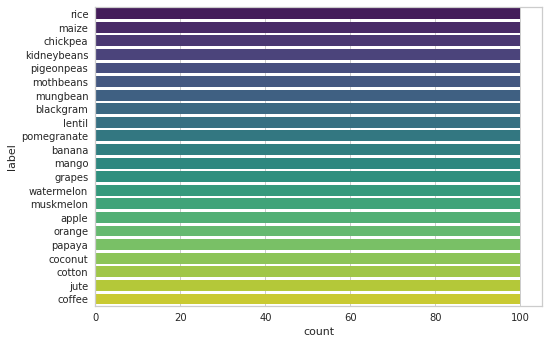

In [19]:
sns.countplot(y='label',data=data, palette="viridis")

- Explore the relationships and distributions within a dataset buy using pair plot

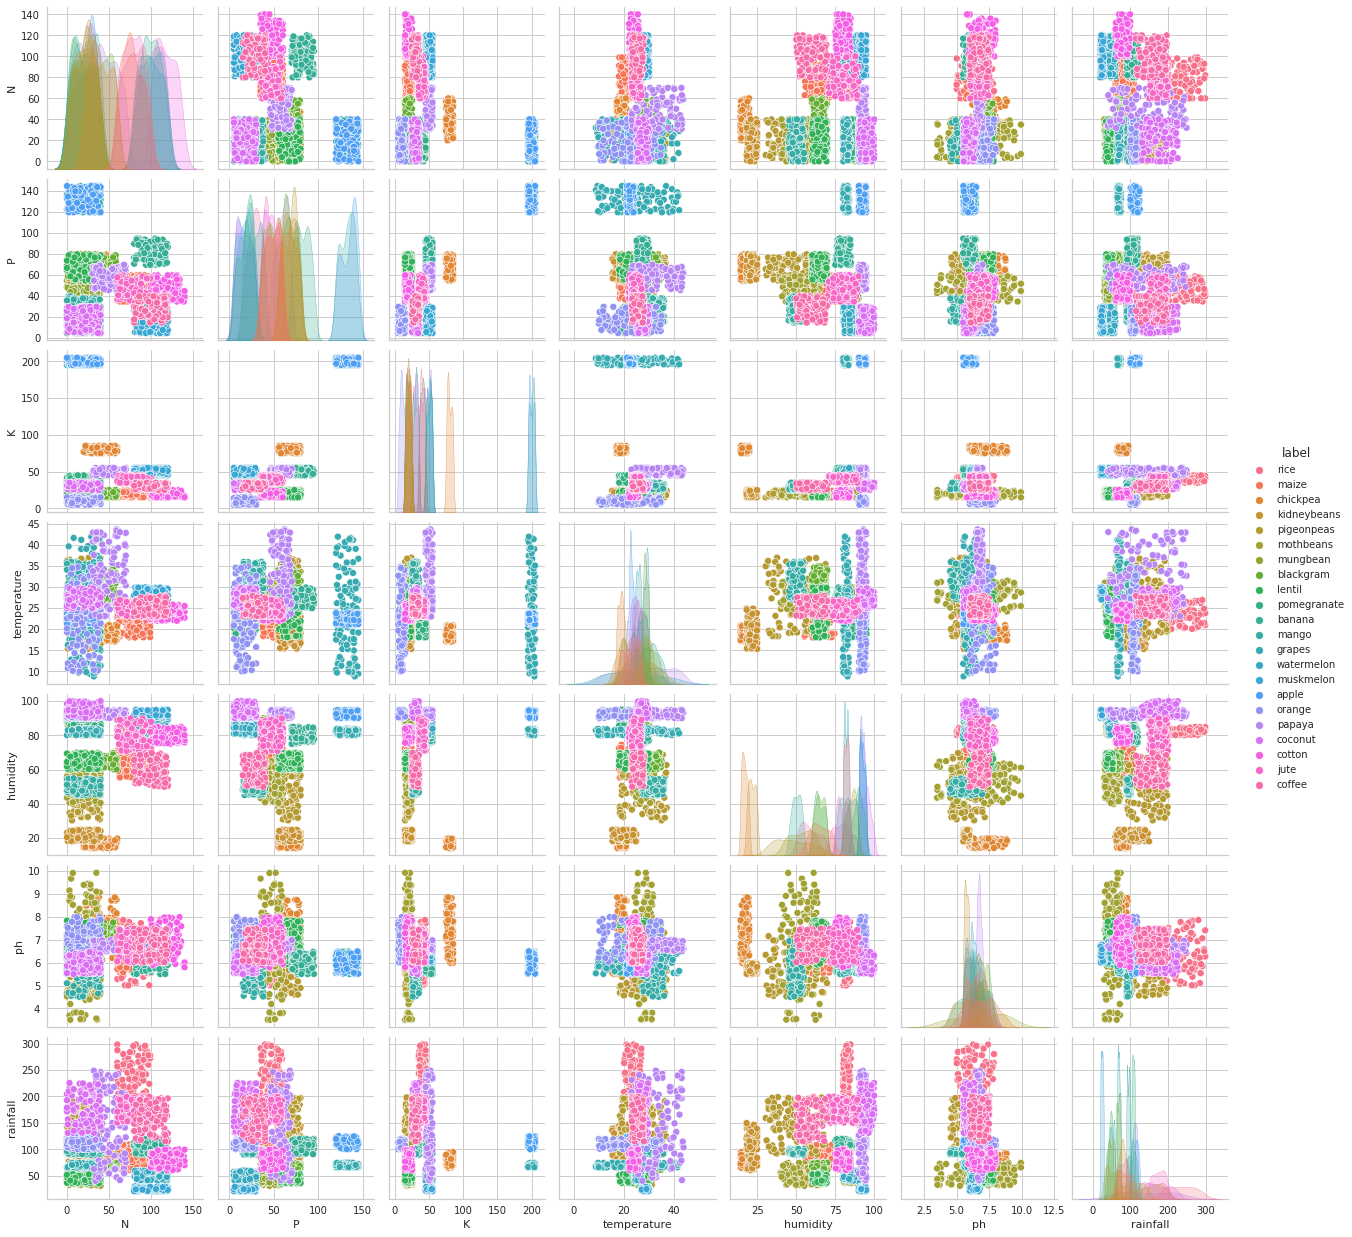

In [20]:
sns.pairplot(data, hue = 'label')

#### Rain affects soil moisture which affects ph of the soil. 
- Visualize the behavior of different plants under the conditions against humidity and rainfall

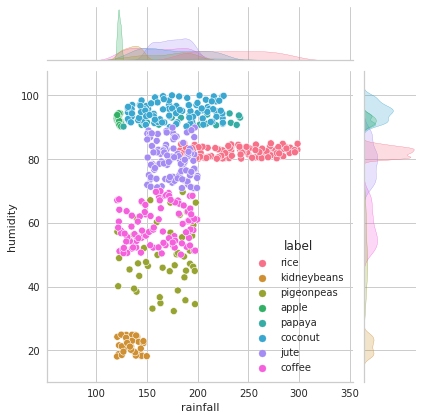

In [21]:
sns.jointplot(x="rainfall",y="humidity",data=data[(data['temperature']<30) & (data['rainfall']>120)],hue="label")

- The above graph shows how different types of crops do, behave under given conditions of humidity and rainfall for example for rice rainfall should be well-distributed throughout the growing seasonas well as high humidity, as rice needs a continuous supply of water from the time of planting to the time of harvest. When it comes to Kidneybeans modferate rainfall and humidity. 


#### The correlation between average potassium (K) and average nitrogen (N) values in soil, particularly when both are above 50, is crucial in understanding how soil nutrients impact the nutritional value of plants.

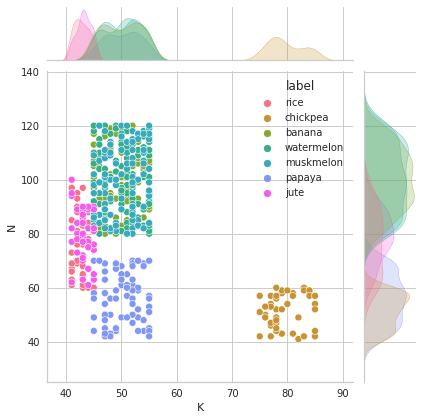

In [22]:
sns.jointplot(x="K",y="N",data=data[(data['N']>40)&(data['K']>40)],hue="label")

Visualize a plot of humidity against K to show how different type of crops vary.

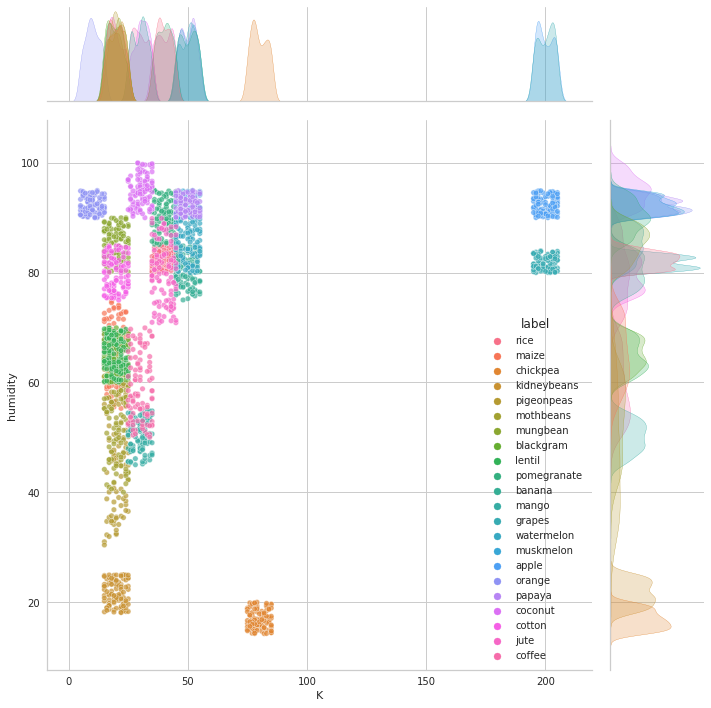

In [23]:
sns.jointplot(x="K",y="humidity",data=data,hue='label',size=10,s=30,alpha=0.7)

#### The above plot shows a pairplot between `humidity` and `K` potassium levels in the soil and how different plants perform under certain humidity and potassium levels.


#### When it comes to ph values a stability of 6-7 is preferred because it ensures optimal nutrient availability and supports healthy microbial activity in the soil, leading to better plant growth

<AxesSubplot:xlabel='ph', ylabel='label'>

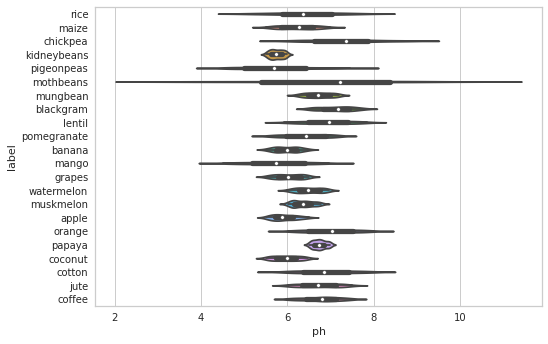

In [24]:
sns.violinplot(y='label',x='ph',data=data)

Visualize a plot of the label against Phosphorous Levels.

<AxesSubplot:xlabel='P', ylabel='label'>

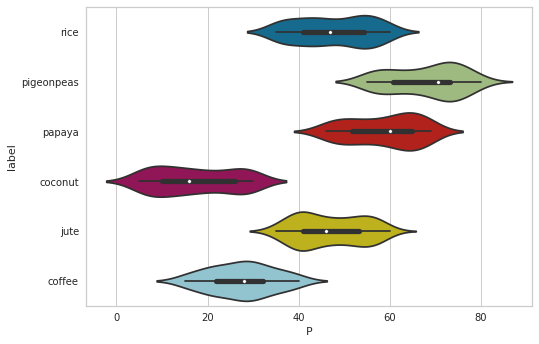

In [25]:
sns.violinplot(y='label',x='P',data=data[data['rainfall']>150])

In [66]:
# Features Selection
selected_features = {'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'}
selected_features

{'K', 'N', 'P', 'humidity', 'ph', 'rainfall', 'temperature'}

### Compare Each Features with Crops

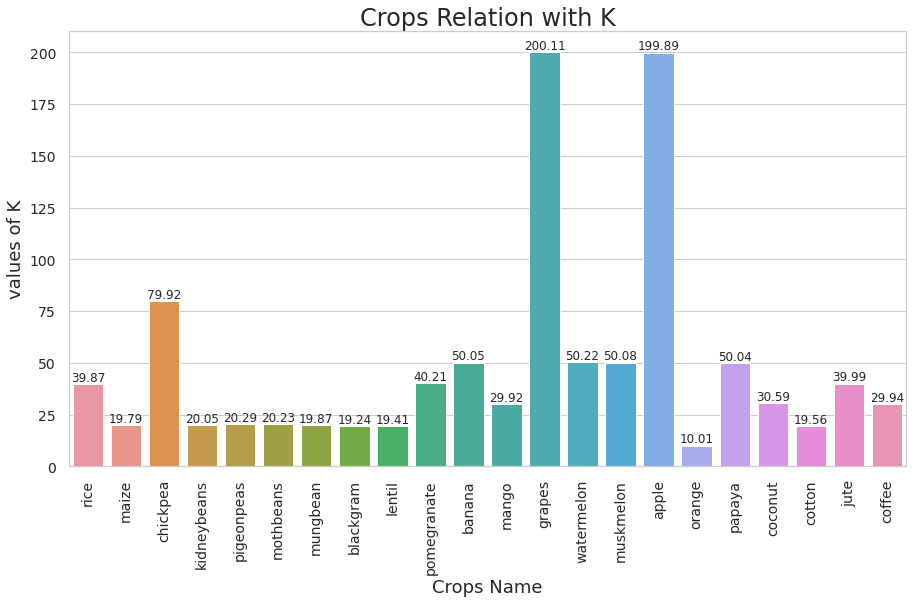

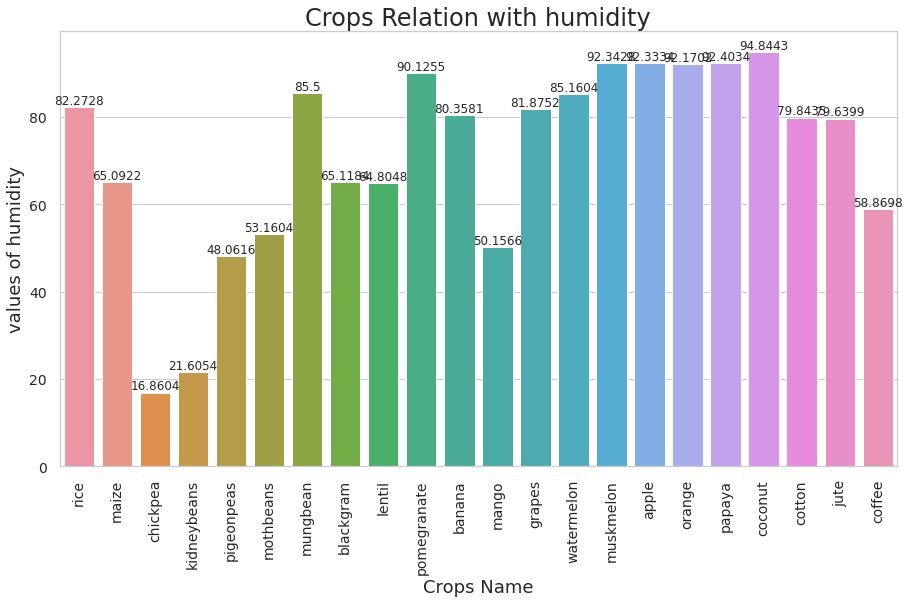

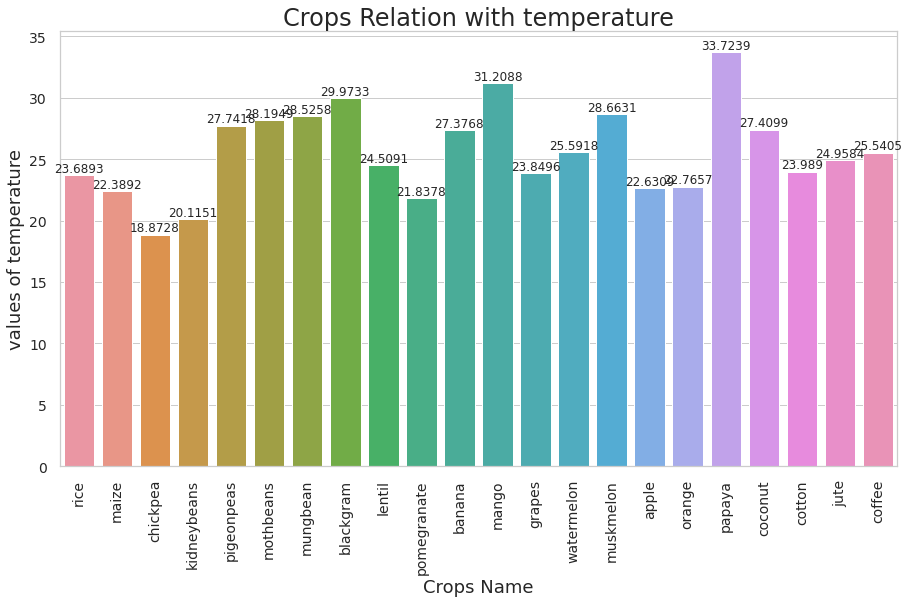

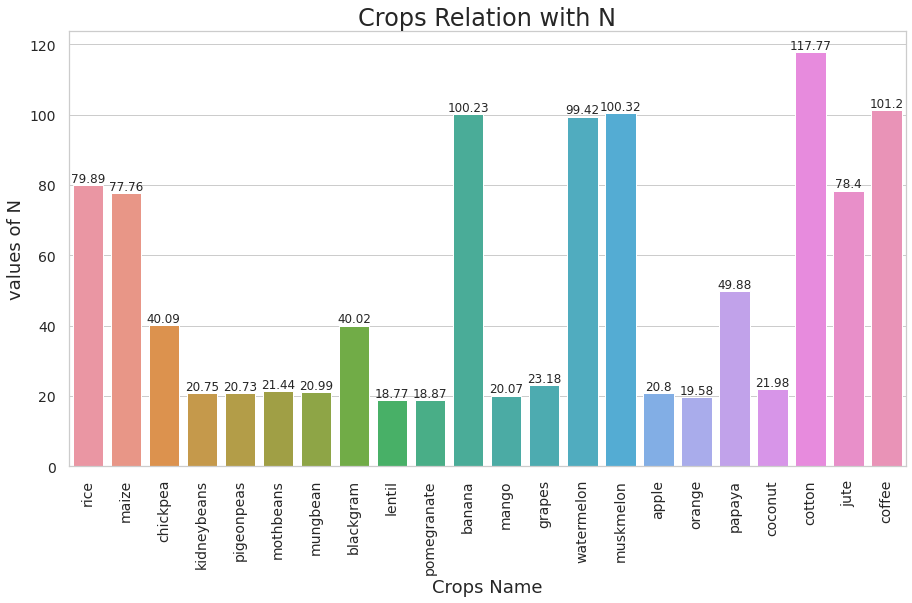

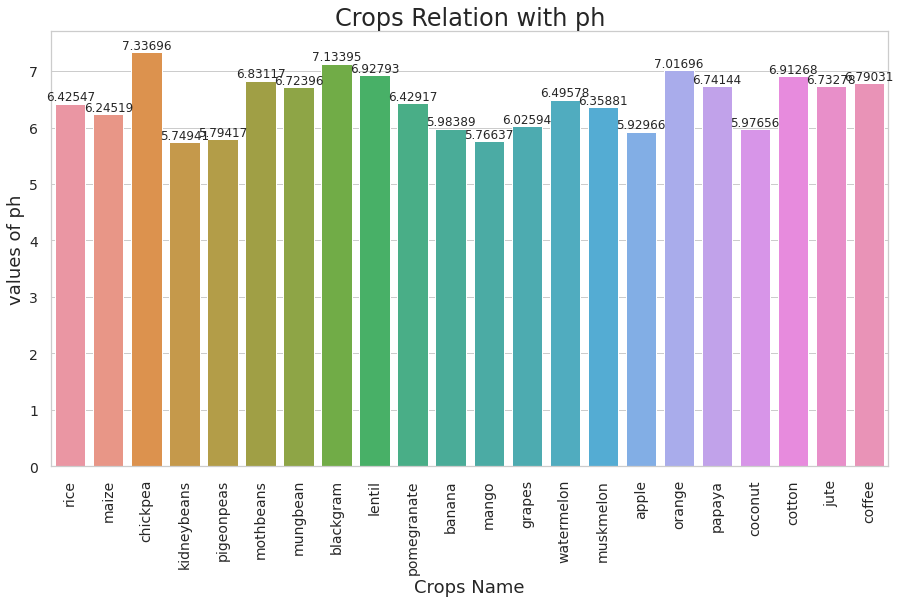

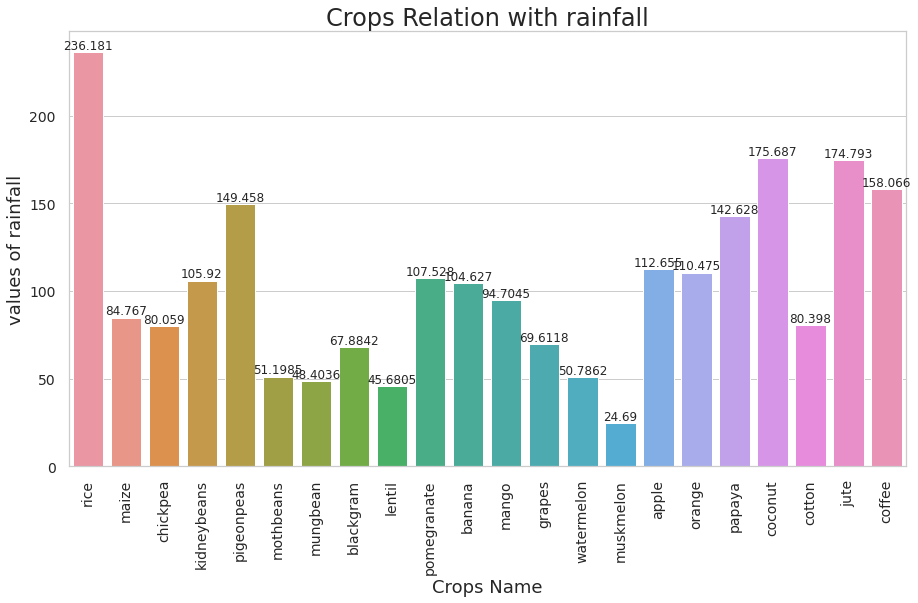

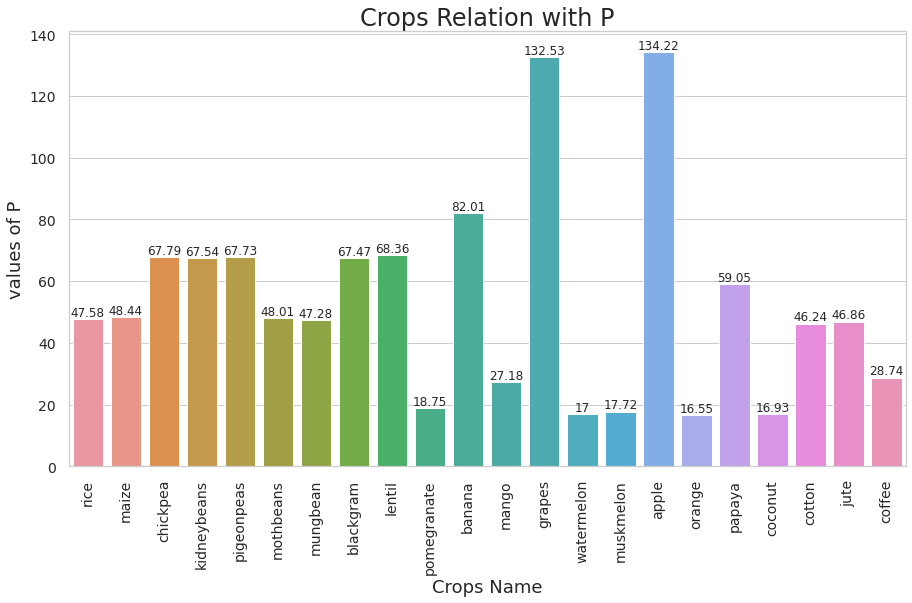

In [67]:
# Barplot Function for Compasison Graph
def crop_relation_visual(yfeature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize=(15,8))

    ax = sns.barplot(x="label", y=yfeature, data=df, ci=None)
    ax.bar_label(ax.containers[0], fontsize=12)

    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(rotation=0, fontsize=14)
    plt.title("Crops Relation with " + str(yfeature), fontsize = 24)
    plt.xlabel("Crops Name", fontsize = 18)
    plt.ylabel("values of " + str(yfeature), fontsize = 18)
    
for x in selected_features:
        crop_relation_visual(x)
    

# DATA PRE-PROCESSING



In [26]:
dummies = pd.get_dummies(data.label).astype(int)
dummies.head()

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
df = pd.concat([data,dummies],axis=1)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
c = df.label.astype('category')
targets = dict(enumerate(c.cat.categories))

df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

In [29]:
y.head()

0    20
1    20
2    20
3    20
4    20
Name: target, dtype: int8

In [30]:
y.shape

(2200,)

In [31]:
X.shape

(2200, 7)

## Correlation visualization between features.

<AxesSubplot:>

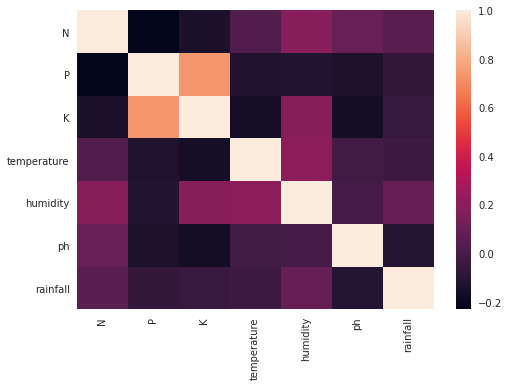

In [32]:
sns.heatmap(X.corr())

### We can see that Phosphorous levels and Potassium levels are highly correlated.

# FEATURE SCALING
- Feature scaling is important because it ensures that all features contribute equally to the model's performance by bringing them to a common scale, which improves the stability and accuracy of many machine learning algorithms.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled


array([[0.64285714, 0.27857143, 0.165     , ..., 0.81221086, 0.61679743,
        0.79382191],
       [0.12142857, 0.48571429, 0.065     , ..., 0.23625665, 0.33028052,
        0.63628751],
       [0.17142857, 0.34285714, 0.06      , ..., 0.87281   , 0.45307532,
        0.13407257],
       ...,
       [0.65714286, 0.54285714, 0.235     , ..., 0.72640287, 0.37060324,
        0.29958316],
       [0.2       , 0.37857143, 0.38      , ..., 0.02665663, 0.41558809,
        0.2623663 ],
       [0.67857143, 0.49285714, 0.225     , ..., 0.77240463, 0.38789088,
        0.32258513]])

In [34]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[1.78571429e-01, 8.85714286e-01, 9.50000000e-01, ...,
        7.80635632e-01, 3.52837015e-01, 1.86956311e-01],
       [7.57142857e-01, 1.07142857e-01, 2.30000000e-01, ...,
        8.94874993e-01, 4.40825998e-01, 4.68528757e-04],
       [2.35714286e-01, 3.85714286e-01, 8.50000000e-02, ...,
        8.55762148e-02, 3.79255120e-01, 3.66745331e-01],
       ...,
       [2.14285714e-02, 3.92857143e-01, 7.00000000e-02, ...,
        3.08679835e-01, 2.03960752e-01, 2.89069451e-01],
       [1.71428571e-01, 9.00000000e-01, 9.55000000e-01, ...,
        8.10576044e-01, 3.45861133e-01, 1.61697985e-01],
       [1.00000000e-01, 3.85714286e-01, 8.50000000e-02, ...,
        6.25731596e-01, 5.06826661e-01, 9.54249792e-02]])

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1650, 7), (550, 7), (1650,), (550,))

# MODEL SELECTION

## First of We will use KNN Classifier for Crop prediction. 
<hr>

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9781818181818182

This accuracy of 0.97 for a KNN classifier indicates that the model correctly predicted the class labels for 97% of the data points in the test set.

### Confusion Matrix

<AxesSubplot:>

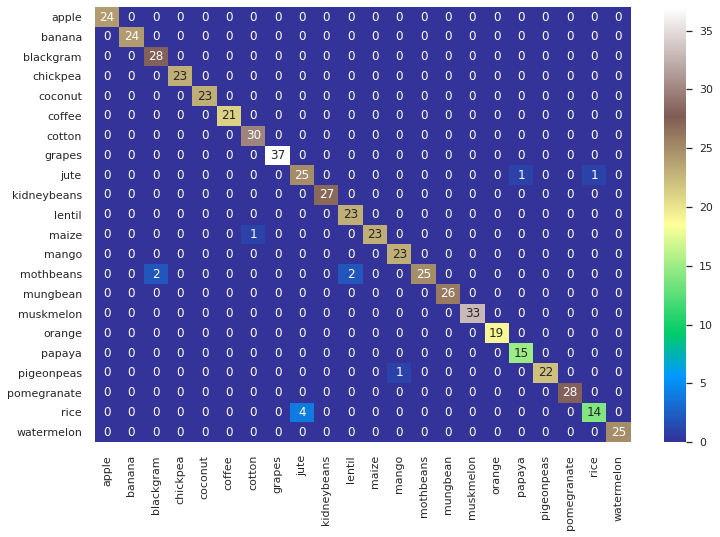

In [37]:
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))

sns.set(font_scale=1.0)
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

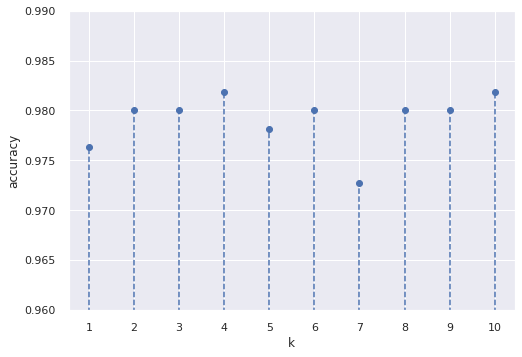

In [38]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

## Classification using Support Vector Classifer (SVC)
<hr>

In [39]:
svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.9745454545454545


In [40]:
svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Rbf Kernel Accuracy:  0.9872727272727273


In [41]:
svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Poly Kernel Accuracy:  0.9890909090909091


### Increase SVC Linear model accuracy by Hyperparameter tuning.


In [42]:
params = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=params, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

### We use hyper parameters such as GridsearchCV for tuning our moel for better results

In [43]:
print(model.best_score_ )

0.9866710547967747


### After having the results of the best performing parameters now use them to train the model to get better results.

## Classification using Random Forest.
<hr>

In [44]:
rfc = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(rfc.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

RF Accuracy on training set: 0.97
RF Accuracy on test set: 0.97


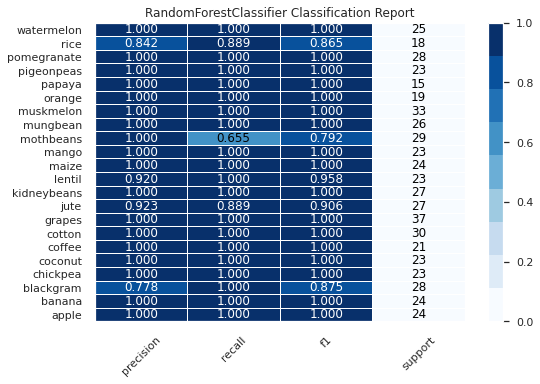

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [45]:
classes=list(targets.values())
visualizer = ClassificationReport(rfc, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show()

## Use Gradient Boosting
<hr>

In [54]:
gbc = GradientBoostingClassifier().fit(X_train, y_train)
grad.score(X_test,y_test)


0.9927272727272727

In [55]:
predictions = gbc.predict(X_test)
print(f"Predictions: {predictions}")

Predictions: [ 7 15  9 15  8 21  9 16  8 18 19  8  5 12 13  1  1  4  1 16 10  0 19 17
 15  1  7  4  6 21 11 11 15  0 13  6 12  2 14 16 18  7 16 17  4 19 17  5
  3  8  3 11 10 19  5 14 21 21  6 12  2 14 19  1  5 15  3  7  0  8  7 12
 16 11 20 21 21 11  6 12  3  1  0 16  6  2  6 12 13 19  8 18  7 21 14 14
  9  6  7 14  1  8 17 13  4 17 19  1  6 11 14  0 19  3 15 10  2 12 11  5
  2  8 15  6  9  3  9 13 21 14 20 10 16  0  9  3  6  4  3 14 10  2  5 18
 15 19 17 10 13 21 14  4 10 17 12 14 11  2  6  8 20  8  7 17 21 18 14  0
 13  3 18  4 18 10  7  8 20 20  6  7  6  7  6 15  2 19  5 17  7  1 21 16
  1  0 15 14 10  7  8 20  4  2 15 14 18 20 11 10  1 19 21  8  8  9 15 11
  8 10  5  5 13  8  9  6 11 15  0  2 15  7 10 15  0  5  7 12  0  7  3  5
 15 15  9  8 15 21 19 13 18 19  7 19 15  3 13 19 16 15  6 11 13 11 18  0
  0 21  2  1  6  4  7  0  4  2 12 15  8  1 14 19 14 12 13 14  9 13  7 11
  1  9 20  4  1  7 15  9 18  5  6 14  6  3  7  0 15  7 20 21 15 20  5  7
  0 11  7 19 13  9 12 16  2 11  4  9 1

In [56]:
def crop_predict(temperature, humidity, ph, rainfall):
    x = np.zeros(len(X.columns))
    x[0] = temperature
    x[1] = humidity
    x[2] = ph
    x[3] = rainfall
    
    # Predict the crop label using the trained model
    return gbc.predict([x])[0]

In [58]:
import pickle
with open('crop-recommendation-dataset.pickle','wb')as f:
    pickle.dump(gbc,f)

In [59]:
from joblib import dump
dump(model, 'crop type recommendation.joblib')

['crop type recommendation.joblib']

In [61]:
import json
columns = {
    'data_columns': [col.lower()for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))